<a href="https://colab.research.google.com/github/ansonsibi1/Credit-Card-Default-Prediction---Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**


* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 

# **Loading Dataset and Importing Modules**

In [ ]:
# importing modules
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



##Mount the drive and import the dataset

In [ ]:
# mounting the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load Taiwan customers default payments dataset
credit_df=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Capstone Project 3/default of credit card clients.csv',skiprows=1)

#**Data Exploration**

##**Summary of data**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
credit_df.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
#Getting the shape of dataset with rows and columns
print(credit_df.shape)

(30000, 25)


In [ ]:
# Identifying all the features of dataset.
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#Information of the whole dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Summary statistics of the given dataset.
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#getting number of the unique values in each feature.
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

#**Data Preprocessing**

###**Null Values**

In [ ]:
#check for count of missing values in each column.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###**Duplicate values**

**Why is it important to remove duplicate records from my data?** 
* ***"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [ ]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Renaming the Target variable.
credit_df= credit_df.rename(columns={'default payment next month': 'def payment'})


In [ ]:
#Renaming the below mentioned columns .
credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
# Reindexing the columns based on the order of month.
credit_df= (credit_df.reindex(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_APR','PAY_MAY', 'PAY_JUN', 'PAY_JUL','PAY_AUG', 'PAY_SEPT',
      'BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL','BILL_AMT_AUG', 'BILL_AMT_SEPT',
        'PAY_AMT_APR', 'PAY_AMT_MAY','PAY_AMT_JUN',  'PAY_AMT_JUL', 'PAY_AMT_AUG','PAY_AMT_SEPT',
        'def payment'], axis=1)
          .dropna(how='all', axis=1))

#**Exploratory Data Analysis**

In [ ]:
#plotting the count plot to vizualize the data distribution
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

##**Univariate Analysis**

### **Analysis of Dependent Variable:**

In [ ]:
# counts the dependent variable data set
credit_df['def payment'].value_counts()

0    23364
1     6636
Name: def payment, dtype: int64

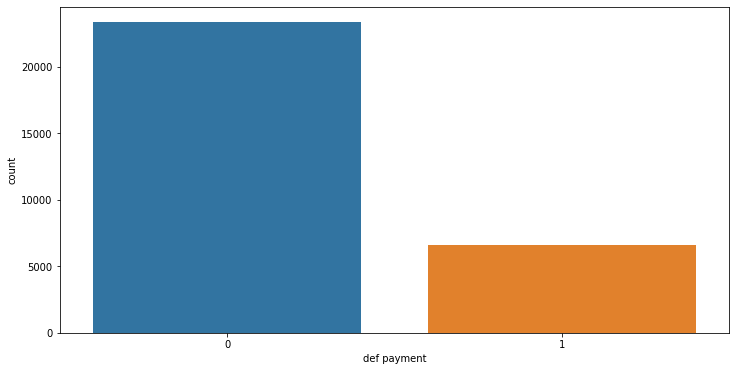

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(credit_df['def payment'])

##**Categorical Feautures**





###**SEX**

In [ ]:
#Finding the value counts for unique values in SEX

credit_df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

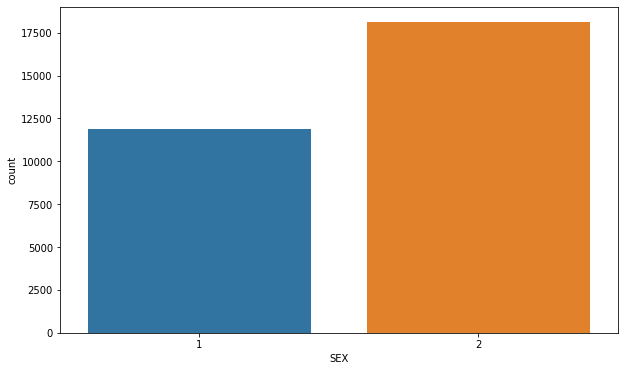

In [ ]:
#plotting the count plot of SEX to vizualize the data distribution

plt.figure(figsize=(10,6))
sns.countplot(credit_df['SEX'])

###**MARRIAGE**

In [ ]:
#Finding the value counts for unique values in MARRIAGE
credit_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

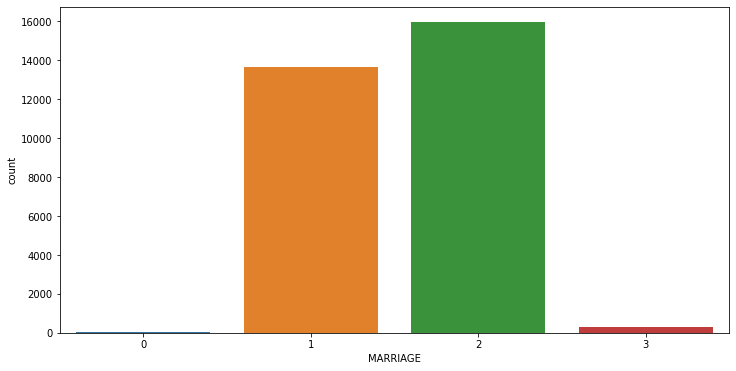

In [ ]:
#plotting the count plot of MARRIAGE to vizualize the data distribution
plt.figure(figsize=(12,6))
sns.countplot(credit_df['MARRIAGE'])

###**EDUCATION**

In [ ]:
#Finding the value counts for unique values in education
credit_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

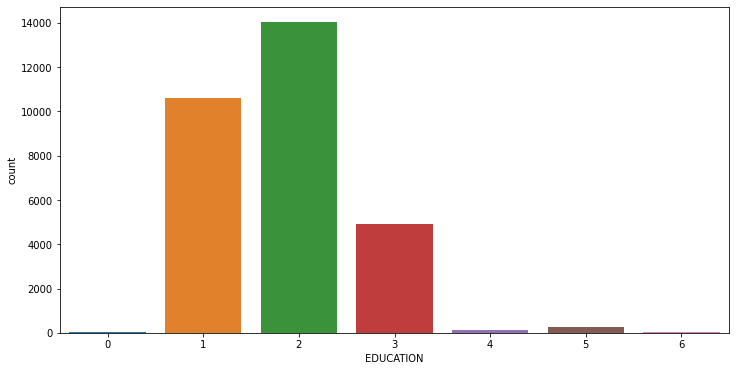

In [ ]:
#plotting the count plot of Education to vizualize the data distribution
plt.figure(figsize=(12,6))
sns.countplot(credit_df['EDUCATION'])

There are few people on the 'unknown' categories (0, 5, 6) and, although their probabilities of default are not exactly close, all of them are lower than the probabilities found for the 'well defined' labels (1, 2 and 3). I'll be making the choice of putting them together with the same value.

###**HISTORY OF PAST PAYMENT**

In [ ]:
#Creating a new dataframe for history of past payments.
Past_pay=credit_df[[ 'PAY_APR','PAY_MAY', 'PAY_JUN', 'PAY_JUL','PAY_AUG', 'PAY_SEPT']]


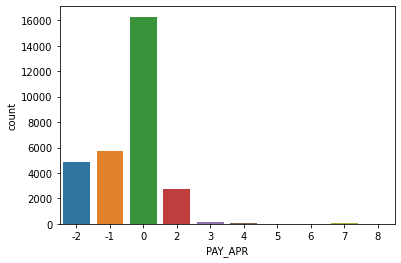

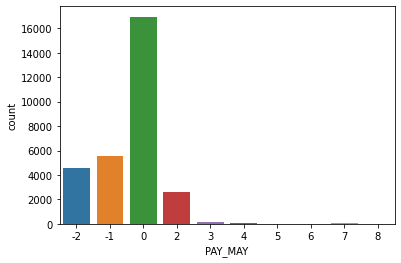

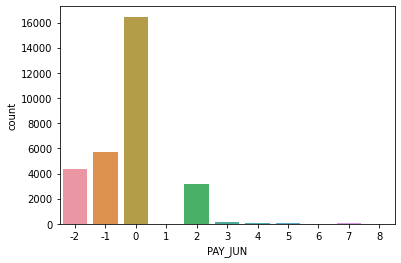

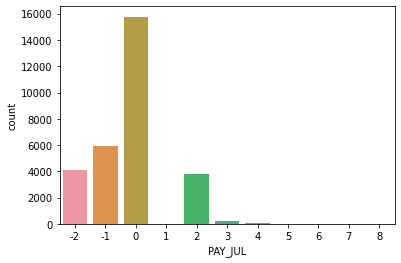

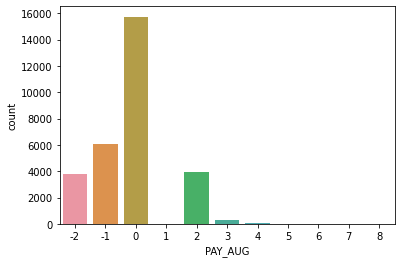

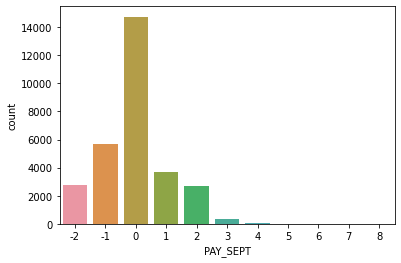

In [ ]:
#plotting the count plot  to vizualize the data distribution of history of past payment.
for i, col in enumerate(Past_pay.columns):
    plt.figure(i)
    sns.countplot(x=col, data=Past_pay)

##**Numerical Feautures**

###**AGE**

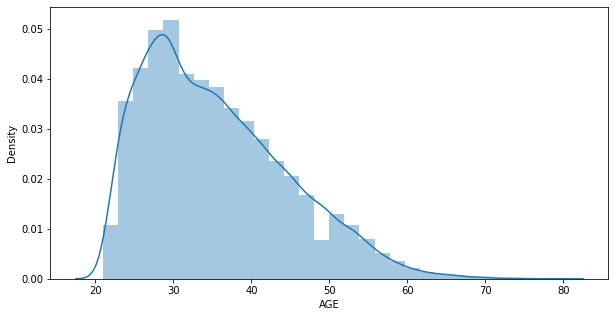

In [ ]:
#Plotting how the distribution of AGE looks like.
plt.figure(figsize=(10,5))
sns.distplot(credit_df['AGE'],kde=True,bins=30);

Most people in our dataset have between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower, but we could divide our dataset in bins and check the percentage of default in each age group to be sure.

###**Cedit Amount**

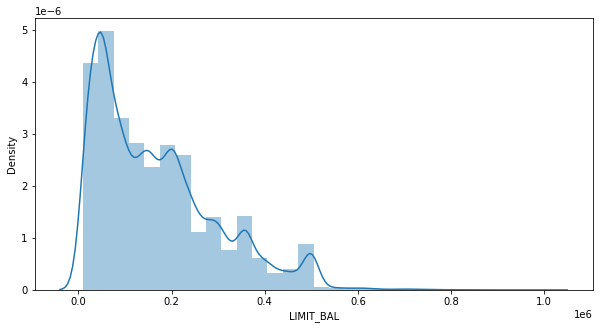

In [ ]:
#Plotting to know how the distribution of LIMIT_BAL looks like.

plt.figure(figsize=(10,5))
sns.distplot(credit_df['LIMIT_BAL'],kde=True,bins=30);

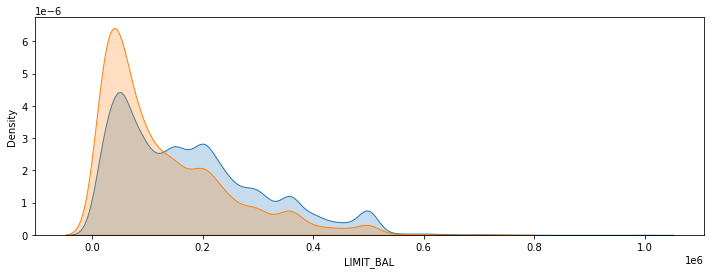

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(credit_df.loc[(credit_df['def payment'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(credit_df.loc[(credit_df['def payment'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)

Most customers have 200k or less of credit limit. And it seems that we will find a higher concentration of customers in default on that range.

###**Paid Amount**

In [ ]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = credit_df[['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'def payment']]

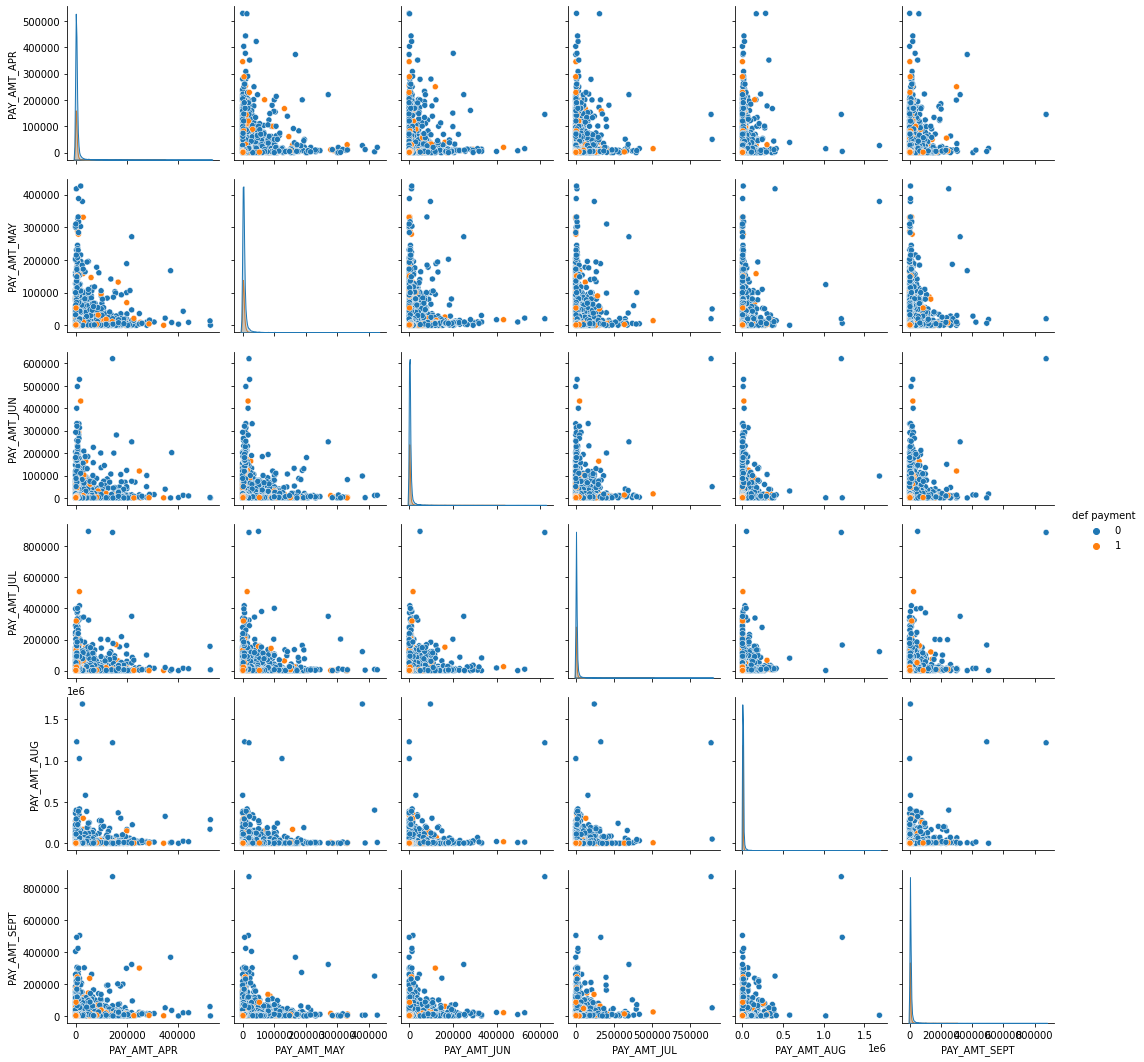

In [ ]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='def payment')

In [ ]:
credit_df.shape

(30000, 25)

##**Bivariate Analysis**

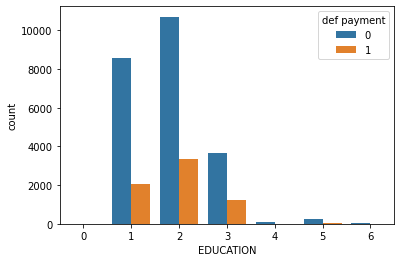

In [ ]:
#plotting  data distribution related to the default_payment_next_month with respect to Education
ax=sns.countplot(x='EDUCATION', hue='def payment', data=credit_df)
plt.show()

The predominant level of education in our dataset is (1 = graduate school; 2 = university; 3 = high school; 4 = others ;and (0,5,6)=Unknown)

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability

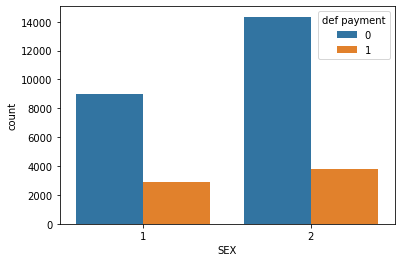

In [ ]:
#plotting data distribution related to the default_payment_next_month with respect to SEX
ax=sns.countplot(x='SEX', hue='def payment', data=credit_df)
plt.show()

There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. We will try to confirm it a little later by comparing men and women with the same education and marital status.

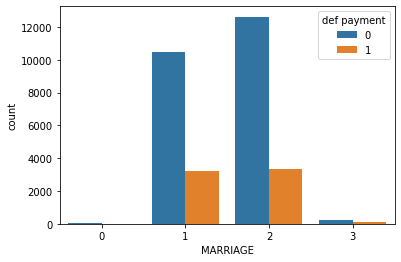

In [ ]:
#plotting  data distribution related to the default_payment_next_month with respect to MARRIAGE
marri = sns.countplot(x="MARRIAGE", hue='def payment', data=credit_df )

plt.show()

* ***High defaulter rate when it comes to others***

Text(0, 0.5, '% of Default')

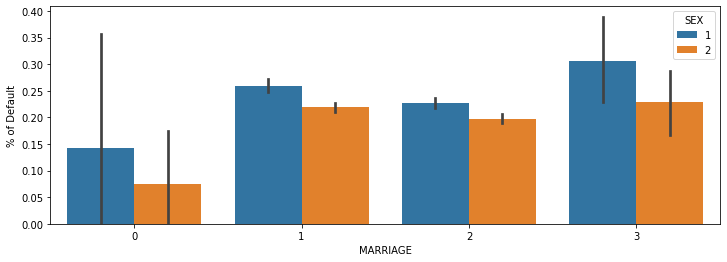

In [ ]:

plt.figure(figsize=(12,4))

sns.barplot(x = "MARRIAGE", y = "def payment", hue = "SEX", data = credit_df)

plt.ylabel("% of Default")



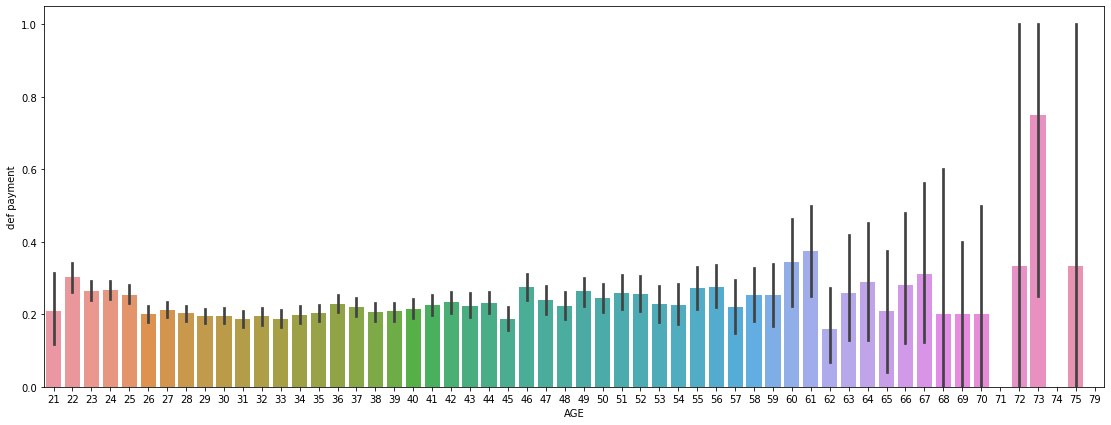

In [ ]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'def payment', data = credit_df)

plt.show()

##**Multivariate Analysis**

Text(0.5, 1.0, 'Corration values for feaures')

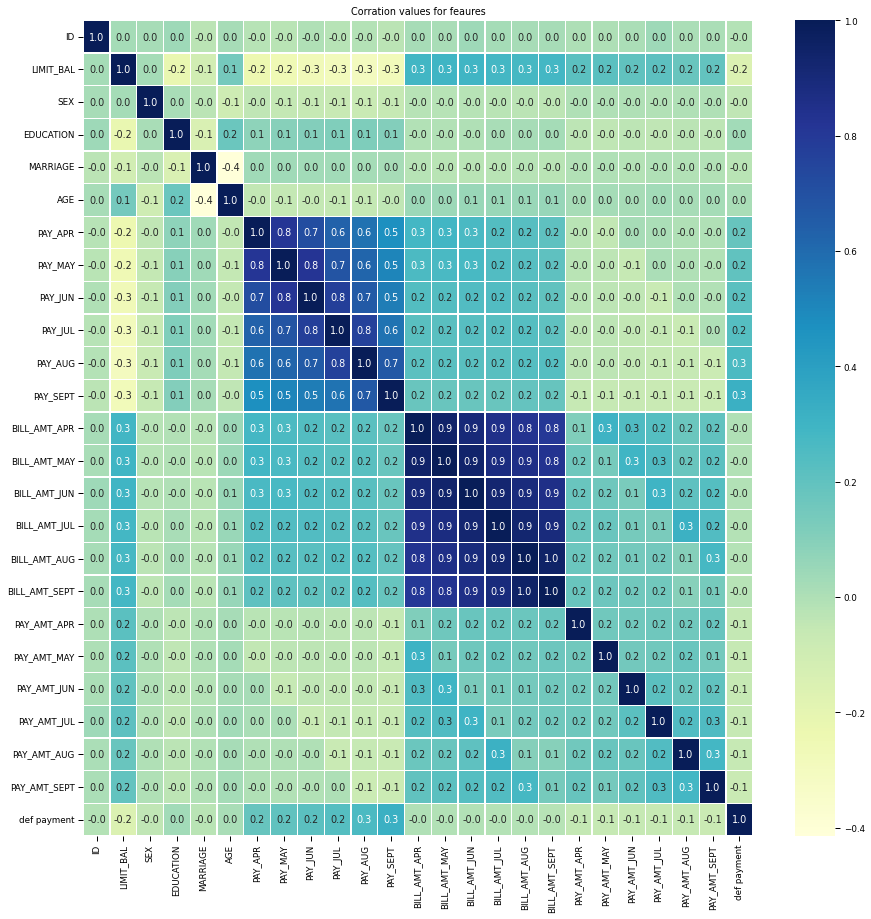

In [ ]:
corr_df=credit_df
correlation=corr_df.corr()
f = plt.figure(figsize= (15,15))
sns.set_context("paper", font_scale=1.)
sns.heatmap(correlation,  annot=True,  linewidths=.3, fmt= '.1f',cmap="YlGnBu")
plt.title("Corration values for feaures")

#SMOTE

* ***SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. 
It aims to balance class distribution by randomly increasing minority class examples by replicating them.***

In [ ]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['def payment'])

In [ ]:
columns = list(credit_df.columns)

In [ ]:
columns.pop()

'def payment'

In [ ]:
credit_df_sampled = pd.DataFrame(x_smote, columns=columns)

In [ ]:
credit_df_sampled['def payment'] = y_smote

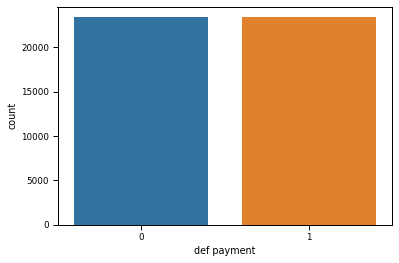

In [ ]:
#plot the count plot after smote
sns.countplot('def payment', data = credit_df_sampled)

* ***Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.***

#**Feauture Engineering**

In [ ]:
#Replacing 0,5,and 6 to 4 in EDUCATION column
credit_df.replace({'EDUCATION': {0 : 4 ,5 : 4 ,6 : 4}}, inplace=True)

In [ ]:
#Replacing 0 in marriage to 3
credit_df.replace({'MARRIAGE': {0 : 3}}, inplace=True)

In [ ]:
#Replacing non specified values in problem statement to -1(pay duly) in payment columns.
credit_df.replace({'PAY_APR': {-2 : -1 , 0 : -1},'PAY_APR': {-2 : -1 , 0 : -1},'PAY_APR': {-2 : -1 , 0 : -1},
                  'PAY_MAY': {-2 : -1 , 0 : -1},'PAY_JUN': {-2 : -1 , 0 : -1},'PAY_JUL': {-2 : -1 , 0 : -1},
                  'PAY_AUG': {-2 : -1 , 0 : -1},'PAY_SEPT': {-2 : -1 , 0 : -1}},inplace=True)

In [ ]:
#save a copy file in other variable
credit_copy=credit_df_sampled.copy()

In [ ]:
credit_copy.head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,...,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEPT,def payment
0,1,20000,2,2,1,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,1
1,2,120000,2,2,2,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,4,50000,2,2,1,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,5,50000,1,2,1,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,0


## **One Hot Encoding**

* ***One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.***
* ***here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'***

In [ ]:
#Creating dummy variables
credit_copy = pd.get_dummies(credit_copy,columns=['EDUCATION','MARRIAGE'])

In [ ]:
credit_copy= pd.get_dummies(credit_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
# LABEL ENCODING FOR SEX
credit_copy.replace({'SEX': {1 : 0 ,2 : 1}}, inplace=True)

In [ ]:
credit_copy.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_APR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,1,24,0,0,0,689,3102,3913,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,1,26,3261,3455,3272,2682,1725,2682,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,1,34,15549,14948,14331,13559,14027,29239,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,1,37,29547,28959,28314,49291,48233,46990,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,0,57,19131,19146,20940,35835,5670,8617,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
credit_copy.shape

(46728, 88)

In [ ]:
credit_copy.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_APR', 'BILL_AMT_MAY',
       'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
       'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
       'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'def payment', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2',
       'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7',
       'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2',
       'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7',
       'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2',
       'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6